In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('./data.csv')

### Data Dictionary
#### Original
    age - age 
    sex - male = 1, female = 0
    cp - chest pain (0, 4)
    trestbps - resting blood pressure
    chol - serum cholesteral (mg/dl)
    fbs - fasting sugar (120 mg/dl)(1 = True, 0 = False)
    restecg - resting ecg
    thalach - max heart rate
    exang - exercise induced angina (1 = True, 0 = False)
    oldpeak - ST depression induced by exercise relative to rest
    slope - peak excercise ST segment slope
    ca - number of major vessels colored by floro (0, 3)
    thal - 3 = normal, 6 = fixed defect, 7 = reversible defect
    target - heart disease (0 = False, 1 = True)_

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

Some of the column names aren't as readable as I would like:

In [5]:
df.rename(columns={
    'cp': 'chest_pain', 
    'trestbps': 'resting_bp', 
    'fbs': 'fasting_sugar', 
    'thalach' : 'max_hr', 
    'exang': 'angina', 
    'oldpeak': 'ST_depression', 
    'slope':'ST_slope',
    'ca':'num_vessels'
    }, inplace=True)

In [6]:
df.head(1) #sanity check

,age,sex,chest_pain,resting_bp,chol,fasting_sugar,restecg,max_hr,angina,ST_depression,ST_slope,num_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [7]:
df.isnull().sum()

age              0
sex              0
chest_pain       0
resting_bp       0
chol             0
fasting_sugar    0
restecg          0
max_hr           0
angina           0
ST_depression    0
ST_slope         0
num_vessels      0
thal             0
target           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age              303 non-null int64
sex              303 non-null int64
chest_pain       303 non-null int64
resting_bp       303 non-null int64
chol             303 non-null int64
fasting_sugar    303 non-null int64
restecg          303 non-null int64
max_hr           303 non-null int64
angina           303 non-null int64
ST_depression    303 non-null float64
ST_slope         303 non-null int64
num_vessels      303 non-null int64
thal             303 non-null int64
target           303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
dont = df['target'][df['target'] == 0].count()
have = df['target'][df['target'] == 1].count()

print('Patients with Heart Disease:', have)
print('Patients without Heart Disease:', dont)

Patients with Heart Disease: 165
Patients without Heart Disease: 138


the classes are fairly even, 165 patients with heart disease and 138 patients without.

In [10]:
import itertools

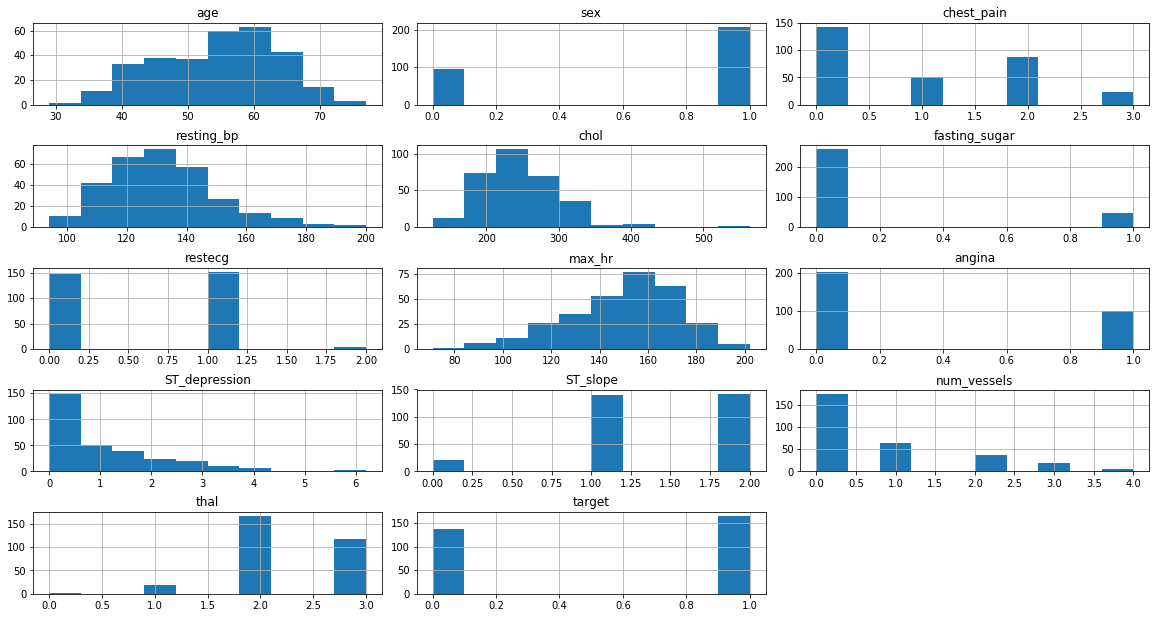

In [11]:
cols=df.columns
plt.subplots(figsize=(20,15))
length=len(cols)
for x, y in itertools.zip_longest(cols,range(length)):
    plt.subplot((length/2),3,y+1)
    plt.subplots_adjust(wspace=0.1,hspace=.5)
    df[x].hist()
    plt.title(x)
plt.show()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


high std in `age, resting_bp, chol, max_hr` tells us there is large spread around the mean

Concerned with outlier on min end with `age, chol, max_hr`

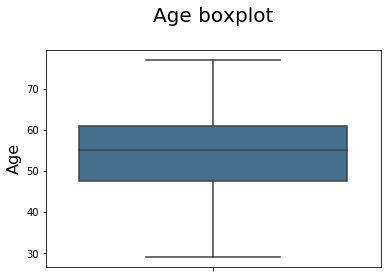

In [13]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(df.age, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_ylabel('Age', fontsize=16)
ax.set_title('Age boxplot\n', fontsize=20)

plt.show()

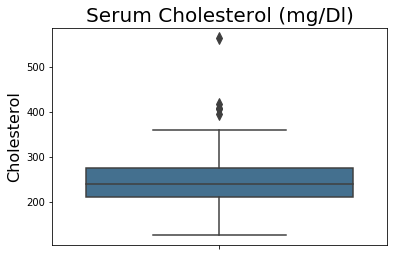

In [45]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(df.chol, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_ylabel('Cholesterol', fontsize=16)
ax.set_title('Serum Cholesterol (mg/Dl)', fontsize=20)

plt.show()

There is actually an outlier at the high end with cholesteral

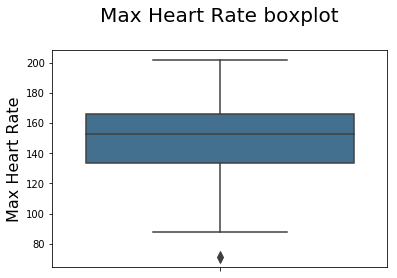

In [15]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(df.max_hr, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_ylabel('Max Heart Rate', fontsize=16)
ax.set_title('Max Heart Rate boxplot\n', fontsize=20)

plt.show()

There appears to be an outlier on the min end for max heart rate

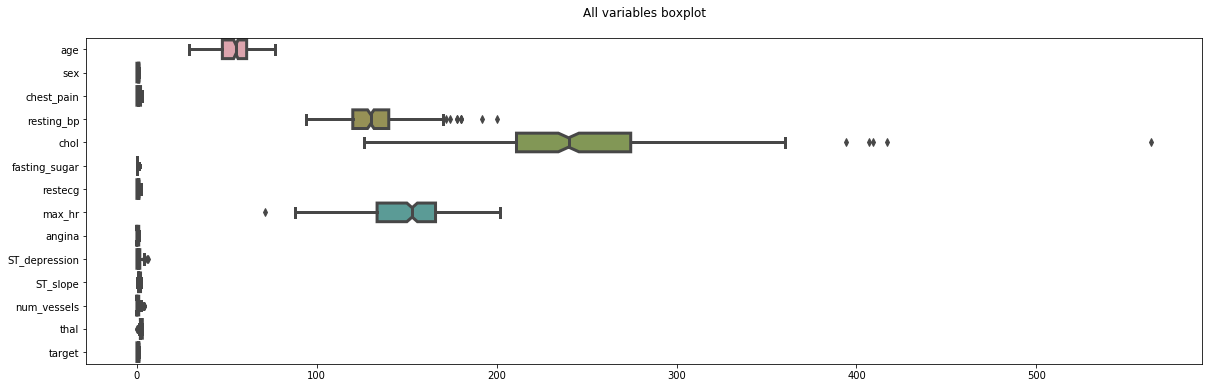

In [16]:
fig = plt.figure(figsize=(20,6))
ax = fig.gca()

ax = sns.boxplot(data=df, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

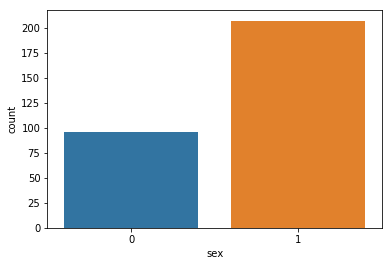

In [46]:
sns.countplot(x='sex', data=df)

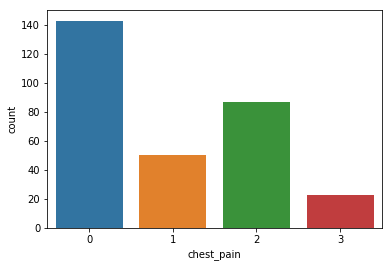

In [47]:
sns.countplot(x='chest_pain', data=df)

Correlations

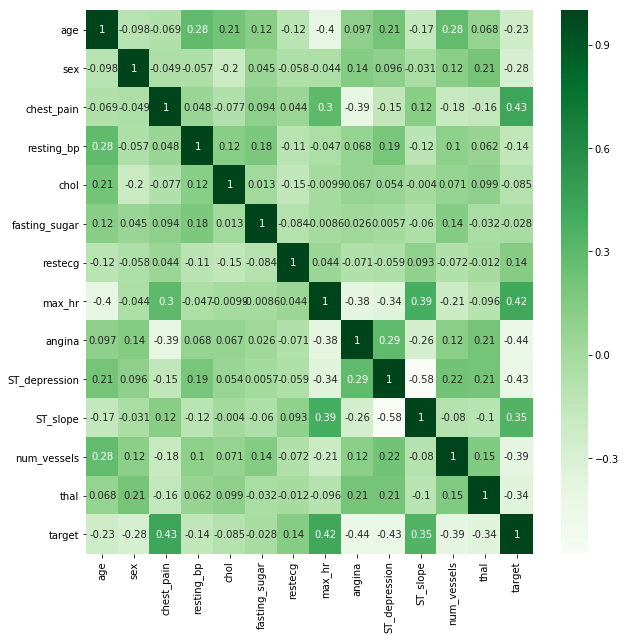

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [63]:
pd.DataFrame(df.corr()['target'])[:13]

,target
age,-0.225439
sex,-0.280937
chest_pain,0.433798
resting_bp,-0.144931
chol,-0.085239
fasting_sugar,-0.028046
restecg,0.137230
max_hr,0.421741
angina,-0.436757
ST_depression,-0.430696


the most highly correlative features appear to be `chest_pain, max_hr, and ST_slope`
1. Chest pain makes sense. If you're having chest pain with increased severity, you are more likely to suffer from a heart attack
2. Max Heart rate or Max Heart Rate is a sign of general heart muscle function
3. I am not sure how the max excercise ST slope is effecting heart rate risk. Will investigate further. 

### Distriubution of the data 

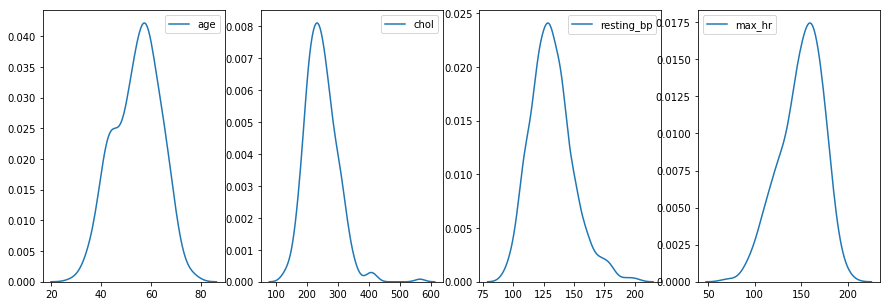

In [18]:
fig, ax=plt.subplots(1,4, figsize=(15,5))
sns.kdeplot(df['age'], ax=ax[0])
sns.kdeplot(df['chol'], ax=ax[1])
sns.kdeplot(df['resting_bp'], ax=ax[2])
sns.kdeplot(df['max_hr'], ax=ax[3])

In [19]:
df.head()

,age,sex,chest_pain,resting_bp,chol,fasting_sugar,restecg,max_hr,angina,ST_depression,ST_slope,num_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


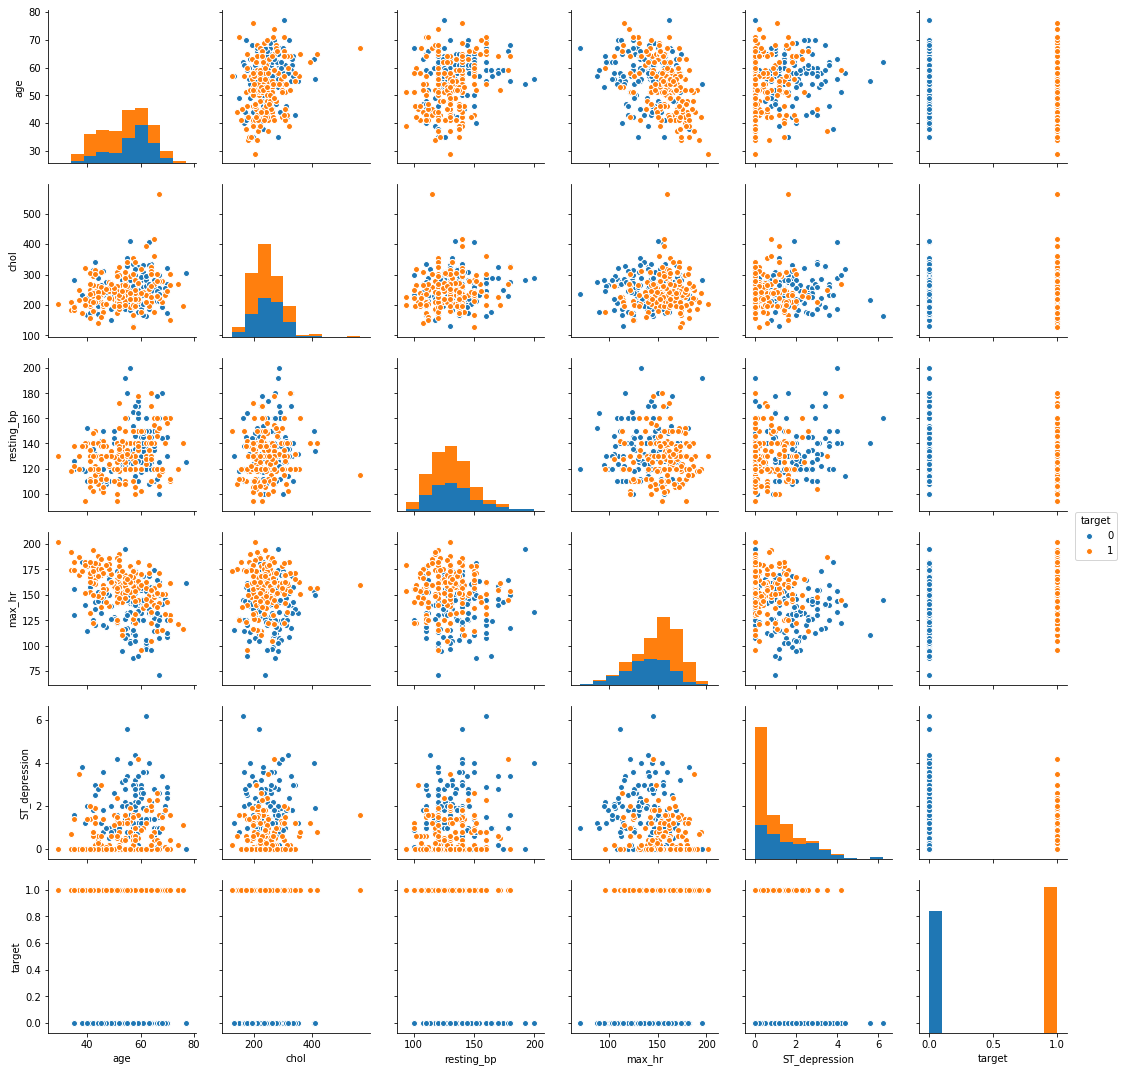

In [20]:
#pair plot of continuous variables
sns.pairplot(df[['age', 'chol', 'resting_bp', 'max_hr', 'ST_depression', 'target']], hue= 'target' )

# Preliminary Modeling 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# preparing X matrix and y series
X = df.drop('target', axis=1)
y = df['target']

In [23]:
# Splitting data into training subset and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Scaling features 
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

lr.fit(X_train_ss, y_train)
print(lr.score(X_train_ss, y_train))
print(lr.score(X_test_ss, y_test))

0.8590308370044053
0.868421052631579


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knc = KNeighborsClassifier(n_neighbors=10, weights='distance')

knc.fit(X_train_ss, y_train)
print(knc.score(X_train_ss, y_train))
print(knc.score(X_test_ss, y_test))

1.0
0.8947368421052632


KNClassifiers performs better on each the train and testing. Train overfit

In [30]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [31]:
models = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors=10, weights='distance'),
          SVC(), 
          DecisionTreeClassifier(), 
          ExtraTreesClassifier(), 
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          GaussianNB(), 
          VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)),], voting='hard')]

model_names = ["Logistic Regression", 
               "k-Nearest Neighbors", 
               "Support Vector Machine", 
               "Decision Tree", 
               "Extra Trees", 
               "Random Forest", 
               "Gradient Boost", 
               "Gaussian Naive Bayes", 
               "Voting Classifier" ]

In [32]:
# unscaled scores
model_scores = [] # empty list to store model scores
for model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    model_scores.append(metrics.accuracy_score(predictions, y_test))
    
df_scores = pd.DataFrame(model_scores, index=model_names)   
df_scores.columns=['Model Score']
df_scores

/Users/lu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Model Score
Logistic Regression,0.868421
k-Nearest Neighbors,0.697368
Support Vector Machine,0.552632
Decision Tree,0.802632
Extra Trees,0.815789
Random Forest,0.802632
Gradient Boost,0.763158
Gaussian Naive Bayes,0.881579
Voting Classifier,0.855263


In [33]:
scaled_scores = []
for model in models:
    model.fit(X_train_ss,y_train)
    predictions = model.predict(X_test_ss)
    scaled_scores.append(metrics.accuracy_score(predictions, y_test))
       
df_scores['Scaled Scores'] = scaled_scores
df_scores

/Users/lu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Model Score,Scaled Scores
Logistic Regression,0.868421,0.868421
k-Nearest Neighbors,0.697368,0.894737
Support Vector Machine,0.552632,0.881579
Decision Tree,0.802632,0.789474
Extra Trees,0.815789,0.828947
Random Forest,0.802632,0.828947
Gradient Boost,0.763158,0.750000
Gaussian Naive Bayes,0.881579,0.881579
Voting Classifier,0.855263,0.802632


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier

In [34]:
RF = RandomForestClassifier()
RF.fit(X, y)
pd.Series(RF.feature_importances_, index=X.columns).sort_values(ascending=False)

ST_depression    0.122705
angina           0.117644
max_hr           0.115797
chest_pain       0.114849
num_vessels      0.092496
thal             0.089631
chol             0.082399
age              0.081859
resting_bp       0.074037
sex              0.053977
ST_slope         0.022823
fasting_sugar    0.017744
restecg          0.014039
dtype: float64

In [35]:
# need to find most important features via 
XTC = ExtraTreesClassifier()
XTC.fit(X, y)
pd.Series(XTC.feature_importances_, index=X.columns).sort_values(ascending=False)

num_vessels      0.128090
thal             0.118915
angina           0.111332
chest_pain       0.092339
max_hr           0.089444
ST_slope         0.087335
age              0.083134
resting_bp       0.071609
ST_depression    0.064614
chol             0.053862
sex              0.052020
restecg          0.026908
fasting_sugar    0.020397
dtype: float64

Random Forest and Extra Trees seem to be in general agreeance with the top important features without respect to order

In [36]:
most_important = ['thal', 'chest_pain', 'num_vessels', 'max_hr', 'ST_depression']
least_important = ['fasting_sugar', 'restecg', 'sex', 'chol', 'ST_slope', 'resting_bp', 'age', 'angina']

In [37]:
df_important = df[most_important]
df_least = df[least_important]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_important, y)

In [39]:
ss = StandardScaler()
Xi_train_ss = ss.fit_transform(X_train)
Xi_test_ss = ss.transform(X_test)

In [41]:
lr = LogisticRegression()

lr.fit(Xi_train_ss, y_train)
print(lr.score(Xi_train_ss, y_train))
print(lr.score(Xi_test_ss, y_test))

0.8370044052863436
0.7894736842105263


Logistic Regression got way worse

In [42]:
knc = KNeighborsClassifier(n_neighbors=10, weights='distance')

knc.fit(Xi_train_ss, y_train)
print(knc.score(Xi_train_ss, y_train))
print(knc.score(Xi_test_ss, y_test))

0.9955947136563876
0.8157894736842105


knc also got worse

In [43]:
important_features_score = []
for model in models:
    model.fit(X_train_ss,y_train)
    predictions = model.predict(X_test_ss)
    important_features_score.append(metrics.accuracy_score(predictions, y_test))
       
df_scores['Important Features'] = important_features_score
df_scores

/Users/lu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Model Score,Scaled Scores,Important Features
Logistic Regression,0.868421,0.868421,0.447368
k-Nearest Neighbors,0.697368,0.894737,0.460526
Support Vector Machine,0.552632,0.881579,0.513158
Decision Tree,0.802632,0.789474,0.513158
Extra Trees,0.815789,0.828947,0.500000
Random Forest,0.802632,0.828947,0.513158
Gradient Boost,0.763158,0.750000,0.513158
Gaussian Naive Bayes,0.881579,0.881579,0.500000
Voting Classifier,0.855263,0.802632,0.539474


Much worse with subset of features